<a href="https://colab.research.google.com/github/Baldros/NLP-Course-HuggingFace/blob/main/3.1.%20Processando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresenta√ß√£o:

    O processamento de dados √© uma etapa fundamental do processo
    de constru√ß√£o de uma Intelig√™ncia Artificial e precisa-se ter
    certo dominio no t√≥pico, sobre tudo quando o assunto √© NLP.

    O objetivo desse t√≥pico √© justamente aprofundar um pouco mais
    nas quest√µes de processamento dos dados e come√ßaremos aqui
    voltando num dos exemplos do primeiro cap√≠tulo do curso.

# Contextualiza√ß√£o do modelo utilizado:

**BERT - Bidirectional Encoder Representations from Transformers**

    BERT √© um modelo de transformadores pr√©-treinado em um grande corpus
    de dados em ingl√™s de maneira auto-supervisionada. Isso significa que
    ele foi pr√©-treinado apenas nos textos brutos, sem nenhum tipo de
    rotula√ß√£o humana (o que √© por que ele pode usar muitos dados dispon√≠veis
    publicamente) com um processo autom√°tico para gerar entradas e r√≥tulos
    a partir desses textos.

**Objetivos:**

    Mais precisamente, ele foi pr√©-treinado com dois objetivos:

    1. Modelagem de linguagem mascarada (MLM): pegando uma senten√ßa, o modelo
    aleatoriamente mascara 15% das palavras na entrada, ent√£o executa a
    senten√ßa mascarada inteira pelo modelo e tem que prever as palavras
    mascaradas. Isso √© diferente das redes neurais recorrentes (RNNs)
    tradicionais que geralmente veem as palavras uma ap√≥s a outra, ou de
    modelos autorregressivos como GPT que internamente mascaram os tokens
    futuros. Isso permite que o modelo aprenda uma representa√ß√£o bidirecional
    da senten√ßa.

    2. Previs√£o da pr√≥xima senten√ßa (NSP): o modelo concatena duas senten√ßas
    mascaradas como entradas durante o pr√©-treinamento. √Äs vezes, elas
    correspondem a senten√ßas que estavam uma ao lado da outra no texto
    original, √†s vezes n√£o. O modelo ent√£o tem que prever se as duas
    senten√ßas estavam seguindo uma √† outra ou n√£o.

    Ou seja, o BERT base √© capaz de aprender uma representa√ß√£o interna
    da l√≠ngua inglesa que pode ser usada para extrair caracter√≠sticas
    √∫teis para uma variedade de tarefas downstream, como classifica√ß√£o
    de texto, an√°lise de sentimento, resposta a perguntas, entre outras.
    Ele √© particularmente eficaz devido √† sua capacidade de entender o
    contexto bidirecional das palavras em uma frase.

Fonte: https://huggingface.co/google-bert/bert-base-uncased

OBS:

    O "uncased" do nome do modelo, significa que ele n√£o faz distin√ß√£o
    entre letras ma√∫sculas e min√∫sculas, como em "nome", "NOME", por
    exemplo. Acho isso importante de se ressaltar, inclusive para o
    melhr entendimento do modelo.

Entendendo um pouco mais do modelo:

1. Experimenta√ß√µes: https://huggingface.co/spaces/exbert-project/exbert

2. Artigo: https://arxiv.org/pdf/1810.04805.pdf

    Aqui utilizaremos o modelo para checar similaridade entre senten√ßas.
    entender isso √© muito importante para entender como os elementos aqui
    ir√£o funcionar.

In [159]:
# Checkpoint:
checkpoint = "bert-base-uncased"

# Entradas:
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]

In [160]:
# Importando a classe de tokeniza√ß√£o:
from transformers import AutoTokenizer

In [161]:
# Instanciando tokenizador:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

**Pytorch**

In [162]:
# Importando Depend√™ncias:
import torch
from transformers import AdamW, AutoModelForSequenceClassification

# Instanciando elementos:
model_pt = AutoModelForSequenceClassification.from_pretrained(checkpoint)
batch_pt = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


    Note que a pr√≥pria biblioteca j√° alertou que os pesos n√£o
    foram inicializados com o modelo e j√° sugere um trainamento,
    ou seja, no nosso caso, um fine-tuning para que o modelo
    possa funcionar adequadamete.

    Ou seja, a quest√£o de comparar os modelos pos e pr√© fine-tuning
    pode ser que nem se d√™ pra fazer, porque pode ser que o modelo
    nem consiga ser executado sem o fine-tuning.

    O que daria pra fazer √© pegar esse modelo fine-tunado com a menor
    quantidade de entradas possiveis e testar com fine-tunado com mais
    entradas. Obviamente o modelo com mais entradas vai funcionar melhor,
    mas d√° pra tendar fazer algum teste de performance.

In [163]:
# Adicionando novo de r√≥tulos:
batch_pt["labels"] = torch.tensor([1, 1])

# Fine-tuning do modelo:
optimizer = AdamW(model_pt.parameters()) # Inicializa o otimizador AdamW (descontinuada) com os par√¢metros do modelo
loss = model_pt(**batch_pt).loss # Calculando a perda do modelo para o lote de dados (batch) fornecidos
loss.backward() # calculando os gradientes dos pesos do modelo com rela√ß√£o √† perda
optimizer.step() # atualizando os pesos do modelo

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Tensorflow**

In [164]:
# Dependencias importantes:
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Instanciando elemetos:
model_tf = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
batch_tf = dict(tokenizer(sequences, padding=True, truncation=True, return_tensors="tf")) # Note a diferen√ßa

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [165]:
# Fine-tuning do modelo:
model_tf.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
labels = tf.convert_to_tensor([1, 1])
model_tf.train_on_batch(batch_tf, labels)

4.172324281626061e-07

**Conclus√£o**

    √â claro, apenas treinar o modelo em duas frases n√£o vai produzir
    resultados muito bons. Para obter melhores resultados, voc√™ precisar√°
    preparar um conjunto de dados maior.

**Nota**

    Apesar de executarem o mesmo procedimento, o processo de fine-tuning
    entre as duas bibliotecas, pytorch e tensorflow, √© bem diferente. Mudando
    at√© a ordem de execu√ß√£o das coisas.

# Datasets para fine-tuning de modelos:

    O Hub da Hugging Face n√£o cont√©m apenas modelos; ele tamb√©m possui v√°rios
    conjuntos de dados em muitos idiomas diferentes. Voc√™ pode navegar pelos
    conjuntos de dados aqui, e recomendamos que voc√™ tente carregar e processar
    um novo conjunto de dados assim que terminar esta se√ß√£o (consulte a
    documenta√ß√£o geral aqui). Mas por enquanto, vamos nos concentrar no
    conjunto de dados MRPC! Este √© um dos 10 conjuntos de dados que comp√µem o
    benchmark GLUE, que √© um benchmark acad√™mico usado para medir o desempenho
    de modelos de ML em 10 tarefas diferentes de classifica√ß√£o de texto.

In [166]:
# Instantando os datasets:
!pip install datasets

In [167]:
# Importando dataset:
from datasets import load_dataset

In [168]:
# Definindo os dataset:
raw_datasets = load_dataset("glue", "mrpc");raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

    Este comando faz o download e armazena em cache o conjunto de dados,
    por padr√£o em ~/.cache/huggingface/datasets. Lembre-se do Cap√≠tulo 2
    que voc√™ pode personalizar sua pasta de cache definindo a vari√°vel de
    ambiente HF_HOME.

In [169]:
# Extraindo informa√ß√µes:
qtd_dados = [raw_datasets[key].num_rows for key in raw_datasets.keys()]
qtd_features = list(raw_datasets['train'].features.keys()) # Todos os outros conjuntos repetiram o modelo do treino
names = list(raw_datasets.keys())

# Printando informa√ß√£o:
print(
    f'''
\033[1mNote:\033[0m

    Como podemos ver, obtemos um objeto DatasetDict que cont√©m o
    conjunto de \033[1m{names[0]}\033[0m, o conjunto de \033[1m{names[1]}\033[0m e o conjunto de \033[1m{names[2]}\033[0m.
    Cada um deles cont√©m v√°rias colunas (\033[1m{qtd_features[0]}\033[0m, \033[1m{qtd_features[1]}\033[0m, \033[1m{qtd_features[2]}\033[0m e \033[1m{qtd_features[3]}\033[0m)
    e um n√∫mero vari√°vel de linhas, que s√£o o n√∫mero de elementos em cada
    conjunto (portanto, existem \033[1m{qtd_dados[0]}\033[0m pares de frases no conjunto de
    treinamento, \033[1m{qtd_dados[1]}\033[0m no conjunto de valida√ß√£o e \033[1m{qtd_dados[2]}\033[0m no
    conjunto de teste).
    ''')


Note:

    Como podemos ver, obtemos um objeto DatasetDict que cont√©m o
    conjunto de train, o conjunto de validation e o conjunto de test.
    Cada um deles cont√©m v√°rias colunas (sentence1, sentence2, label e idx)
    e um n√∫mero vari√°vel de linhas, que s√£o o n√∫mero de elementos em cada
    conjunto (portanto, existem 3668 pares de frases no conjunto de
    treinamento, 408 no conjunto de valida√ß√£o e 1725 no
    conjunto de teste).
    


    Dito isso, podemos acessar o cada par de senten√ßas do nosso conjunto
    de dados para checar e para isso, basta saber como um dicion√°rio funciona.

In [170]:
raw_datasets["train"][0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [171]:
# Checando mais informa√ß√µes:
for i in range(10):
  print(f'Senten√ßas da idx {i}')
  print(f"1¬∫ {raw_datasets['train'][i]['sentence1']}")
  print(f"2¬∫: {raw_datasets['train'][i]['sentence2']}")
  print()

Senten√ßas da idx 0
1¬∫ Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .
2¬∫: Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .

Senten√ßas da idx 1
1¬∫ Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion .
2¬∫: Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 .

Senten√ßas da idx 2
1¬∫ They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added .
2¬∫: On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale .

Senten√ßas da idx 3
1¬∫ Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .
2¬∫: Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .

Senten√ßas da idx 4
1¬∫ The stock rose $ 2.11

**Importante**

    Eu gostaria de pontuar um detalhe que n√£o exatamente muda alguma coisa
    aqui, mas que eu acho importante notar... Note que o dado est√° labelado,
    ou seja, aqui nos temos uma situa√ß√£o de aprendizado supervisionado. Em seu
    livro, Build a Large Language Model (From Scratch), o autor, Sebastian
    Raschka explica que (Imagem abaixo):


In [172]:
# Baixando a imagem do livro:
!curl -o img.png https://drek4537l1klr.cloudfront.net/raschka/v-5/Figures/01__image005.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40099  100 40099    0     0  95328      0 --:--:-- --:--:-- --:--:-- 95247


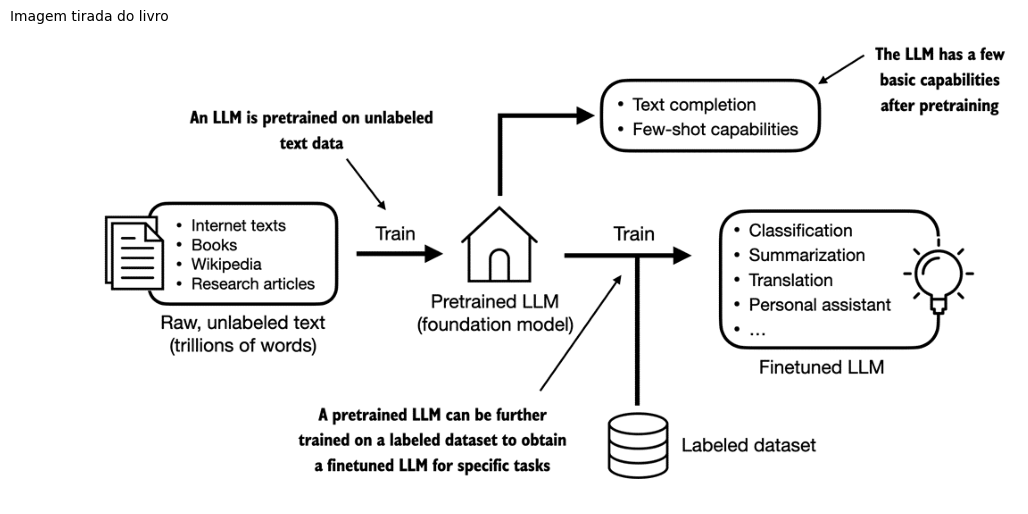

In [173]:
# Importando biblioteca para visualiza√ß√£o:
import cv2
from matplotlib import pyplot as plt

# Carregar a imagem:
imagem = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem. Verifique o caminho da imagem.")
else:
    # Mostrar a imagem usando matplotlib
    plt.figure(figsize=(12,12))
    plt.imshow(imagem, cmap='gray')
    plt.text(0.5, 0.5, 'Imagem tirada do livro', ha='center')
    plt.axis('off')
    plt.show()

    Ou seja, note que o primeiro treinamento do modelo, chamado pelo autor de
    "modelo fundamental" ou "modelo base", √© feito de forma n√£o supervisionada!
    (no caso do BERT eles dizem que √© feito de forma "auto-supervisionada")
    Mas o fine-tuning de fato √© feito de forma supervisionada, como mostra no
    livro. Ou seja, de fato estamos indo de acordo com a literatura vigente.

Dito isso:

    Podemos ver que os r√≥tulos j√° s√£o inteiros, ent√£o n√£o precisaremos fazer
    nenhum pr√©-processamento l√°. Para saber qual inteiro corresponde a qual
    r√≥tulo, podemos inspecionar as caracter√≠sticas do nosso raw_train_dataset.
    Isso nos dir√° o tipo de cada coluna:

In [174]:
raw_datasets["train"].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

    Nos bastidores, o r√≥tulo √© do tipo ClassLabel, e o mapeamento de
    inteiros para o nome do r√≥tulo √© armazenado na pasta names. O 0
    corresponde a not_equivalent, e o 1 corresponde a equivalent.

# Pr√©-processando o Dataset:

    Pr√©-processar o conjunto de dados, nada mais √© que converter o texto
    em n√∫meros para que o modelo possa entender. Como voc√™ vimos no cap√≠tulo
    anterior, isso √© feito com um tokenizador. Podemos fornecer ao tokenizador
    uma senten√ßa ou uma lista de senten√ßas, ent√£o podemos tokenizar diretamente
    todas as primeiras senten√ßas e todas as segundas senten√ßas de cada par dessa forma:

Nota:

    Vimos tamb√©m que o tokenizador utilizado aqui ser√° o mesmo tanto
    pytorch quanto para o tensorflow, o que √© de grande ajuda.

In [175]:
# Importando o tokenizador:
from transformers import AutoTokenizer

OBS:

    A classe AutoTokenizer instancia o tokenizer especificado pelo m√©todo
    from_pretrained() para cada modelo. Estou pontuando isso s√≥ para dizer
    que esse tokenizador pode ser uma Rede Neural ou n√£o, a depender do
    modelo utilizado.

    Nesse caso em espec√≠fico, o tokenizador aqui n√£o √© uma Rede Neural,
    por exemplo, dado que o tokenizador do modelo bert √© um m√©todo de
    pr√©-processamento denominado WordPiece.

Fonte: https://huggingface.co/learn/nlp-course/chapter6/6

In [176]:
# Definindo o modelo:
checkpoint = "bert-base-uncased"

# Instanciando o tokenizador:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [177]:
# Codificando as senten√ßas:
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

    No entanto, n√£o podemos simplesmente passar duas sequ√™ncias para o modelo
    e obter uma previs√£o se as duas senten√ßas s√£o par√°frases ou n√£o. Precisamos
    lidar com as duas sequ√™ncias como um par e aplicar o pr√©-processamento
    apropriado. Felizmente, o tokenizador tamb√©m pode receber um par de
    sequ√™ncias e prepar√°-lo da maneira que nosso modelo BERT espera:

In [178]:
# Entrada para o tokenizador:
inputs = tokenizer("This is the first sentence.", "This is the second one.")

# Checando inputs:
for key in inputs.keys():
  if key == 'token_type_ids':
    print(f'{key}:{inputs[key]} # Os zeros s√£o a parte da primeira senten√ßa')
  else:
    print(f'{key}:{inputs[key]}')

input_ids:[101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102]
token_type_ids:[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] # Os zeros s√£o a parte da primeira senten√ßa
attention_mask:[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


token_type_ids:

    N√≥s discutimos as chaves input_ids e attention_mask no Cap√≠tulo 2, mas
    adiamos a discuss√£o sobre token_type_ids. Neste exemplo, √© isso que
    informa ao modelo qual parte da entrada √© a primeira senten√ßa e qual
    √© a segunda senten√ßa.

Decoder:

    Como j√° vimos tamb√©m podemos utilizar o decoder para reconstruir a
    mensagem em caracteres.

In [179]:
# Destokeniza√ß√£o:
list_msg = tokenizer.convert_ids_to_tokens(inputs["input_ids"]);print(list_msg)

['[CLS]', 'this', 'is', 'the', 'first', 'sentence', '.', '[SEP]', 'this', 'is', 'the', 'second', 'one', '.', '[SEP]']


    Note que temos os tokens especiais, ent√£o vemos que o modelo espera que
    as entradas estejam na forma [CLS] senten√ßa1 [SEP] senten√ßa2 [SEP] quando
    h√° duas senten√ßas. Alinhando isso com os token_type_ids, temos:

In [180]:
# Imporando pandas para ajudar a visualizar:
import pandas as pd

In [181]:
# Comparando token_type_ids com a mensagem destokenizada:
pd.concat([pd.DataFrame(list_msg, columns=['msg']),pd.DataFrame(inputs["token_type_ids"], columns=['token_type_ids'])],axis=1)

msg  token_type_ids
0      [CLS]               0
1       this               0
2         is               0
3        the               0
4      first               0
5   sentence               0
6          .               0
7      [SEP]               0
8       this               1
9         is               1
10       the               1
11    second               1
12       one               1
13         .               1
14     [SEP]               1

    Ou seja, aqui estamos vendo que de fato o valor do token_type_ids
    se refere a ou indice da senten√ßa. Show.

**E se eu aumentar o numero de senten√ßas?**

    Vamos ver abaixo que o modelo s√≥ est√° preparado para lidar com
    a similiaridade entre 2 senten√ßas apenas, ou seja, se houver a
    necessidade de executar a similaridade entre mais que 2 senten√ßas,
    vai ter-se que se buscar uma adapta√ß√£o.

In [182]:
# Tokenizando e convertendo para tokens e token_type_ids para a primeira entrada:
inputs1 = tokenizer("This is the first sentence.", "This is the second one.")
list_msg1 = tokenizer.convert_ids_to_tokens(inputs1["input_ids"])

# Tokenizando e convertendo para tokens e token_type_ids para a segunda entrada:
inputs2 = tokenizer("This is the first sentence.", "This is the second one.","This is the third.","This is the forth.")
list_msg2 = tokenizer.convert_ids_to_tokens(inputs2["input_ids"])

# Construindo DataFrames para cada entrada do tokenizador:
df1 = pd.DataFrame(list_msg1, columns=['msg'])
df1['token_type_ids'] = inputs1['token_type_ids']

df2 = pd.DataFrame(list_msg2, columns=['msg'])
df2['token_type_ids'] = inputs2['token_type_ids']

# Verificando se os DataFrames s√£o diferentes:
print(df1.equals(df2))

True


In [183]:
# Checando a informa√ß√£o das duas tokeniza√ß√µes:
pd.concat([df1,df2],axis=1) # note como n√£o mudas as tabelas:

msg  token_type_ids       msg  token_type_ids
0      [CLS]               0     [CLS]               0
1       this               0      this               0
2         is               0        is               0
3        the               0       the               0
4      first               0     first               0
5   sentence               0  sentence               0
6          .               0         .               0
7      [SEP]               0     [SEP]               0
8       this               1      this               1
9         is               1        is               1
10       the               1       the               1
11    second               1    second               1
12       one               1       one               1
13         .               1         .               1
14     [SEP]               1     [SEP]               1

**Conclus√£o**

    Note que a classe do AutoTokenizer, instanciado na variavel tonkenizer,
    simplesmente ignora as outras senten√ßas. Isso acontece, porque essa classe
    foi construida para lidar com os tokenizadores de TODOS os modelos, ou seja,
    a classe aceita tudo... E a entrada √© tratada, dado o modelo e seu tokenizer
    e a biblioteca transformer simplesmente n√£o comenta nada sobre...

    Ou seja, a ideia aqui √© refor√ßar que o usu√°rio da biblioteca conhe√ßa a
    fundo os modelos que ele est√° utilizando para entender como eles funcionam,
    para conseguir lidar com esse tipo de situa√ß√£o sem perder tempo.

**Como o BERT calcula a similaridade?**

    Mesmo buscando sobre, at√© mesmo no artigo do modelo, eles n√£o
    explicam exatamente como o BERT calcularia a similaridade entre
    senten√ßas. O meu palpite √© a similaridade de cossenos e √© isso
    que eu pretendo textar aqui.

**pytorch**

In [184]:
import numpy as np

In [185]:
# Tokenizando entradas:
inputs_pt= tokenizer("This is the first sentence.", "This is the second one.", return_tensors='pt')

# Realizando a infer√™ncia:
outputs_pt = model_pt(**inputs_pt)

# Acessando o vetor semantico, resultado da ultima camada:
embbeding = outputs_pt[0]

print(embbeding) # Ou seja os embbedings

tensor([[-0.5069,  0.1286]], grad_fn=<AddmmBackward0>)


In [186]:
# Importando m√©trica de similaridade:
from torch.nn.functional import cosine_similarity

# Suponha que `embeddings` seja o tensor que voc√™ obteve
embeddings = outputs_pt[0]

# Dividir os embeddings ao meio para obter os embeddings de cada senten√ßa
n = embeddings.shape[1] // 2
first_sentence_embeddings = embeddings[:, :n]
second_sentence_embeddings = embeddings[:, n:]

# Calcular a similaridade de cosseno entre os embeddings das duas senten√ßas
similarity = cosine_similarity(first_sentence_embeddings, second_sentence_embeddings)

print("Similaridade de cosseno entre as duas senten√ßas:", similarity.item())

Similaridade de cosseno entre as duas senten√ßas: -1.0


In [187]:
# Acessando os labels:
model_pt.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

**Tensorflow**

In [188]:
# Tokenizando entradas:
inputs_tf = tokenizer("This is the first sentence.", "This is the second one.", return_tensors='tf')

# Realizando a infer√™ncia:
outputs_tf = model_tf(inputs_tf)

# Acessando o vetor semantico, resultado da ultima camada:
print(outputs_tf[0])

tf.Tensor([[-0.24819224  0.7436232 ]], shape=(1, 2), dtype=float32)


In [189]:
# Importando m√©trica de similaridade:
from sklearn.metrics.pairwise import cosine_similarity

# Acessar os embeddings da √∫ltima camada oculta
embeddings = outputs_tf[0]

# Separar os embeddings para cada senten√ßa
n = embeddings.shape[1] // 2
first_sentence_embeddings = embeddings[:, :n]
second_sentence_embeddings = embeddings[:, n:]

# Calcular a similaridade de cosseno entre os embeddings das duas senten√ßas
similarity = cosine_similarity(first_sentence_embeddings.numpy(), second_sentence_embeddings.numpy())

print("Similaridade de cosseno entre as duas senten√ßas:", similarity.item())

Similaridade de cosseno entre as duas senten√ßas: -1.0


In [190]:
# Acessando os labels:
model_tf.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

    O m√©todo aqui que ser√° utilizado para checar a similaridade de
    senten√ßas, ser√° o modelo BERT utilizado no m√©todo pipeline como
    text-classification.
    
    Provavelmente esse n√£o √© o melhor jeito de se testar esse tipo de
    coisa, mas √© como eu consigo fazer no momento.

In [191]:
from transformers import pipeline

# Carregue o pipeline de 'text-classification' com 'bert-base-uncased':
text_similarity = pipeline("text-classification", model=checkpoint)

# Calcule a similaridade entre as frases
similarity_score = text_similarity("This is the first sentence.", "This is the second one.")

print("Similaridade entre as frases:", similarity_score)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Ignoring args : ('This is the second one.',)


Similaridade entre as frases: [{'label': 'LABEL_1', 'score': 0.5395547151565552}]


**Conclus√£o**

    Continuamos no escuro sobre como o BERT calcula a similaridade entre
    senten√ßas, pelo menos por enquanto, pode ser que mais para frente isso
    seja explicado. A conclus√£o q eu chego √© q de fato, ressalvado q o
    pipeline talvez seja limitado para testar isso com mais precis√£o, de
    fato n√£o parece ser similaridade de cosseno msm n√£o... Pelo menos n√£o
    de forma simple como¬†eu¬†fiz.

Dito isso, voltando ao curso...

    Como podemos ver, as partes da entrada correspondentes a [CLS] senten√ßa1
    [SEP] todas t√™m um ID de tipo de token 0, enquanto as outras partes,
    correspondentes a senten√ßa2 [SEP], todas t√™m um ID de tipo de token 1.

    Observe que se voc√™ selecionar um ponto de verifica√ß√£o diferente, voc√™ n√£o
    necessariamente ter√° os token_type_ids em suas entradas tokenizadas (por
    exemplo, eles n√£o s√£o retornados se voc√™ usar um modelo DistilBERT). Eles
    s√≥ s√£o retornados quando o modelo souber o que fazer com eles, porque os
    viu durante seu pr√©-treinamento.

    Aqui, o BERT √© pr√©-treinado com IDs de tipo de token, e al√©m do objetivo
    de modelagem de linguagem mascarada que discutimos no Cap√≠tulo 1, ele tem
    um objetivo adicional chamado previs√£o de pr√≥xima senten√ßa. O objetivo
    dessa tarefa √© modelar a rela√ß√£o entre pares de senten√ßas.

    Com a previs√£o de pr√≥xima senten√ßa, o modelo recebe pares de senten√ßas
    (com tokens aleatoriamente mascarados) e √© solicitado a prever se a segunda
    senten√ßa segue a primeira. Para tornar a tarefa n√£o trivial, metade do
    tempo as senten√ßas se seguem no documento original de onde foram extra√≠das,
    e a outra metade do tempo as duas senten√ßas v√™m de dois documentos diferentes.

    Em geral, n√£o precisamos nos preocupar se h√° ou n√£o token_type_ids em suas
    entradas tokenizadas: desde que voc√™ use o mesmo ponto de verifica√ß√£o para
    o tokenizador e o modelo, tudo ficar√° bem, pois o tokenizador sabe o que
    fornecer ao seu modelo.

    Agora que vimos como nosso tokenizador pode lidar com um par de senten√ßas,
    podemos us√°-lo para tokenizar todo o nosso conjunto de dados: como no
    cap√≠tulo anterior, podemos alimentar o tokenizador com uma lista de pares
    de senten√ßas, fornecendo-lhe a lista de primeiras senten√ßas e depois a
    lista de segundas senten√ßas. Isso tamb√©m √© compat√≠vel com as op√ß√µes de
    preenchimento e truncamento que vimos no Cap√≠tulo 2. Portanto, uma maneira
    de pr√©-processar o conjunto de dados de treinamento √©:

In [192]:
# Dataset tokenizado
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

    Isso funciona bem, mas tem a desvantagem de retornar um dicion√°rio
    (com nossas chaves, input_ids, attention_mask e token_type_ids, e
    valores que s√£o listas de listas). Tamb√©m s√≥ funcionar√° se voc√™ tiver
    mem√≥ria RAM suficiente para armazenar todo o seu conjunto de dados
    durante a tokeniza√ß√£o (enquanto os conjuntos de dados da biblioteca ü§ó
    Datasets s√£o arquivos Apache Arrow armazenados no disco, ent√£o voc√™ s√≥
    mant√©m as amostras que solicita carregadas na mem√≥ria).

    Para manter os dados como um conjunto de dados, usaremos o m√©todo
    Dataset map(). Isso tamb√©m nos permite alguma flexibilidade adicional,
    se precisarmos de mais pr√©-processamento do que apenas a tokeniza√ß√£o.
    O m√©todo map() funciona aplicando uma fun√ß√£o em cada elemento do conjunto
    de dados, ent√£o vamos definir uma fun√ß√£o que tokeniza nossas entradas:

In [193]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

    Esta fun√ß√£o recebe um dicion√°rio (como os itens do nosso conjunto de dados)
    e retorna um novo dicion√°rio com as chaves input_ids, attention_mask e
    token_type_ids. Observe que tamb√©m funciona se o dicion√°rio de exemplo
    contiver v√°rias amostras (cada chave como uma lista de senten√ßas), j√°
    que o tokenizador funciona em listas de pares de senten√ßas, como visto
    anteriormente. Isso nos permitir√° usar a op√ß√£o batched=True em nossa
    chamada para map(), o que acelerar√° muito a tokeniza√ß√£o. O tokenizador
    √© suportado por um tokenizador escrito em Rust da biblioteca ü§ó Tokenizers.
    Este tokenizador pode ser muito r√°pido, mas apenas se dermos muitas entradas de uma vez.

    Observe que deixamos o argumento de preenchimento de fora em nossa fun√ß√£o
    de tokeniza√ß√£o por enquanto. Isso ocorre porque preencher todas as amostras
    at√© o comprimento m√°ximo n√£o √© eficiente: √© melhor preencher as amostras ao
    construir um lote, pois ent√£o s√≥ precisamos preencher at√© o comprimento
    m√°ximo nesse lote e n√£o o comprimento m√°ximo em todo o conjunto de dados.
    Isso pode economizar muito tempo e poder de processamento quando as
    entradas t√™m comprimentos muito vari√°veis!

    Aqui est√° como aplicamos a fun√ß√£o de tokeniza√ß√£o em todos os nossos
    conjuntos de dados de uma vez. Estamos usando batched=True em nossa
    chamada para map para que a fun√ß√£o seja aplicada a v√°rios elementos de
    nosso conjunto de dados de uma vez, e n√£o em cada elemento separadamente.
    Isso permite um pr√©-processamento mais r√°pido.

In [194]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

    Voc√™ at√© pode usar o multiprocessing ao aplicar sua fun√ß√£o de
    pr√©-processamento com map() passando um argumento num_proc. N√£o
    fizemos isso aqui porque a biblioteca ü§ó Tokenizers j√° usa v√°rios
    threads para tokenizar nossas amostras mais rapidamente, mas se voc√™
    n√£o estiver usando um tokenizador r√°pido suportado por esta biblioteca,
    isso poderia acelerar seu pr√©-processamento.

    Nossa fun√ß√£o tokenize_function retorna um dicion√°rio com as chaves
    input_ids, attention_mask e token_type_ids, ent√£o esses tr√™s campos
    s√£o adicionados a todos os splits do nosso conjunto de dados. Observe
    que tamb√©m poder√≠amos ter alterado campos existentes se nossa fun√ß√£o
    de pr√©-processamento retornasse um novo valor para uma chave existente
    no conjunto de dados ao qual aplicamos map().

    A √∫ltima coisa que precisaremos fazer √© preencher todos os exemplos at√©
    o comprimento do elemento mais longo quando agrupamos elementos juntos,
    uma t√©cnica que chamamos de preenchimento din√¢mico.

## Testando o 15 elemento:

    O curso d√° o desafio de pegar o 15¬∫ elemento, vamos ver o que
    podemos checar de diferente nesse processo.

In [195]:
# Acessar o elemento 15 do conjunto de treinamento
elemento_15 = raw_datasets['train'][15]

# Tokenizar as duas senten√ßas separadamente
sentence1_tokens = tokenizer.tokenize(elemento_15['sentence1'])
sentence2_tokens = tokenizer.tokenize(elemento_15['sentence2'])

# Tokenizar as duas senten√ßas como um par
pair_tokens = tokenizer(elemento_15['sentence1'], elemento_15['sentence2'])

# Exibir os resultados
print("Tokens da primeira senten√ßa:\n", sentence1_tokens)
print("Tokens da segunda senten√ßa:\n", sentence2_tokens)
print("Tokens do par de senten√ßas:")

# Visualizando:
for key in pair_tokens.keys():
  print(f'{key}:{inputs[key]}')

Tokens da primeira senten√ßa:
 ['rudder', 'was', 'most', 'recently', 'senior', 'vice', 'president', 'for', 'the', 'developer', '&', 'platform', 'evan', '##gel', '##ism', 'business', '.']
Tokens da segunda senten√ßa:
 ['senior', 'vice', 'president', 'eric', 'rudder', ',', 'formerly', 'head', 'of', 'the', 'developer', 'and', 'platform', 'evan', '##gel', '##ism', 'unit', ',', 'will', 'lead', 'the', 'new', 'entity', '.']
Tokens do par de senten√ßas:
input_ids:[101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102]
token_type_ids:[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
attention_mask:[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


    N√£o entendi muito bem o que ele gostaria de mostrar
    n√£o, os vetores nem s√£o iguais:

In [196]:
# Checando igualdade dos token_type_ids:
print(pair_tokens['token_type_ids'] == inputs['token_type_ids'])
print(list(pair_tokens['token_type_ids']) == list(inputs['token_type_ids']))

False
False


    Deixa eu dar uma olhada nas sentena√ßas anteriores:

In [206]:
# Checando a primiera senten√ßa:
print("Tokens da primeira senten√ßa:")
for key in tokenized_sentences_1.keys():
  print(f'{key}: Tamanho = {len(tokenized_sentences_1[key])}')

print() # Pulando uma linha entre as sente√ßas

# Checando a segunda senten√ßa:
print("Tokens da segunda senten√ßa:")
for key in tokenized_sentences_2.keys():
  print(f'{key}: Tamanho = {len(tokenized_sentences_2[key])}')


Tokens da primeira senten√ßa:
input_ids:Tamanho = 3668
token_type_ids:Tamanho = 3668
attention_mask:Tamanho = 3668

Tokens da segunda senten√ßa:
input_ids:Tamanho = 3668
token_type_ids:Tamanho = 3668
attention_mask:Tamanho = 3668


# Preenchimento din√¢mico (Dynamic padding):

    Dynamic Padding √© uma t√©cnica de pr√©-processamento de dados usada em
    modelos de linguagem de grande escala (LLMs), que consiste em aplicar
    preenchimento (padding) de forma din√¢mica durante a forma√ß√£o de lotes
    (batches). Em vez de ajustar todos os exemplos para ter o mesmo tamanho
    antes do treinamento, o preenchimento √© aplicado individualmente a cada
    lote, igualando o comprimento m√°ximo presente dentro desse lote. Isso
    otimiza o uso de mem√≥ria e acelera o treinamento, especialmente em modelos
    que lidam com entradas de comprimentos vari√°veis. A fun√ß√£o respons√°vel
    por agrupar amostras dentro de um lote √© chamada de fun√ß√£o de agrupamento
    (collate function).

    Para fazer isso na pr√°tica, temos que definir uma fun√ß√£o de agrupamento
    que aplicar√° a quantidade correta de preenchimento aos itens do conjunto
    de dados que queremos agrupar. Felizmente, a biblioteca ü§ó Transformers
    nos fornece uma fun√ß√£o assim por meio de DataCollatorWithPadding. Ela
    recebe um tokenizador quando voc√™ a instancia (para saber qual token
    de preenchimento usar e se o modelo espera que o preenchimento esteja
    √† esquerda ou √† direita das entradas) e far√° tudo o que voc√™ precisa:

In [198]:
# Importando Classe:
from transformers import DataCollatorWithPadding

    Essa classe funciona para os dois casos, pytorch e tensorflow,
    mudando apenas um par√¢metro da classe.

In [199]:
# Instanciando a classe para o pytorch:
data_collator_pt = DataCollatorWithPadding(tokenizer=tokenizer)

# Instanciando a classe para o tensorflow:
data_collator_tf = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

**DataCollatorWithPadding**

    Esta classe √© respons√°vel por aplicar o preenchimento din√¢mico aos
    exemplos dentro de cada lote (batch), garantindo que todos os exemplos
    em um lote (batch) tenham o mesmo comprimento, preenchendo-os com um
    token de preenchimento adequado. Isso √© essencial quando os exemplos
    de entrada t√™m comprimentos vari√°veis, pois permite que os modelos
    processem os lotes (batch) de maneira eficiente e sem problemas de
    dimens√µes desiguais.
    
    O DataCollatorWithPadding √© configurado com um tokenizador espec√≠fico
    para garantir a consist√™ncia entre os tokens de preenchimento e os
    tokens usados durante a tokeniza√ß√£o dos dados de entrada.

**pytorch**

    Para o pytorch, o agrupador √© um argumento que voc√™ pode passar
    ao construir um DataLoader, sendo o padr√£o uma fun√ß√£o que simplesmente
    converte suas amostras em tensores do PyTorch e as concatena (de forma
    recursiva se seus elementos forem listas, tuplas ou dicion√°rios). Isso
    n√£o ser√° poss√≠vel no nosso caso, pois as entradas que temos n√£o ser√£o
    todas do mesmo tamanho. Deliberadamente, adiamos o preenchimento para
    aplic√°-lo apenas conforme necess√°rio em cada lote e evitar ter entradas
    muito longas com muito preenchimento. Isso acelerar√° bastante o
    treinamento, mas observe que se estiver treinando em uma TPU, pode
    causar problemas - as TPUs preferem formas fixas, mesmo que isso
    exija preenchimento extra.

In [200]:
# Instanciado DataCollatorWithPadding para o pytorch:
data_collator_pt

DataCollatorWithPadding(tokenizer=BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

**Tensorflow**

    Para o tensorflow, o agrupador padr√£o √© uma fun√ß√£o que simplesmente
    converte suas amostras em tf.Tensor e as concatena (de forma recursiva
    se seus elementos forem listas, tuplas ou dicion√°rios). Isso n√£o ser√°
    poss√≠vel no nosso caso, pois as entradas que temos n√£o ser√£o todas do
    mesmo tamanho. Deliberadamente, adiamos o preenchimento, para aplic√°-lo
    apenas conforme necess√°rio em cada lote e evitar ter entradas muito
    longas com muito preenchimento. Isso acelerar√° bastante o treinamento,
    mas observe que se estiver treinando em uma TPU, pode causar problemas
    - as TPUs preferem formas fixas, mesmo que isso exija preenchimento extra.

In [201]:
# Instanciado DataCollatorWithPadding para o tensorflow:
data_collator_tf

DataCollatorWithPadding(tokenizer=BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='tf')

    Apesar do exposto, sem muitas diferen√ßas para DataCollatorWithPadding
    entre as bibliotecas utilizadas, pytorch e tensorflow.

    Para testar esse novo recurso, vamos pegar algumas amostras do nosso
    conjunto de treinamento que gostar√≠amos de agrupar. Aqui, removemos
    as colunas idx, sentence1 e sentence2, pois elas n√£o ser√£o necess√°rias
    e cont√™m strings (e n√£o podemos criar tensores com strings) e vamos dar
    uma olhada nos comprimentos de cada entrada no lote:






In [202]:
# Separando uma amostra:
samples = tokenized_datasets["train"][:8] # Reduzindo o tamanho:
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]} # Reduzindo a dimensionalidade:

# Print da cardinalidade dos elementos:
print([len(x) for x in samples["input_ids"]])

[50, 59, 47, 67, 59, 50, 62, 32]


Note:

    Sem surpresa, obtemos amostras de comprimento vari√°vel, de 32 a 67.
    O dynamic padding significa que as amostras neste batch devem
    ser preenchidas todas com um comprimento de 67, o comprimento m√°ximo
    dentro do lote. Sem dynamic padding, todas as amostras teriam
    que ser preenchidas at√© o comprimento m√°ximo em todo o conjunto de dados,
    ou o comprimento m√°ximo que o modelo pode aceitar. Vamos verificar se nosso
    data_collator est√° aplicando o preenchimento din√¢mico corretamente:
    


**pytorch**

In [203]:
# Gerando lotes:
batch_pt = data_collator_pt(samples)

# Criando DatasetDict tokenizado em batchs:
{k: v.shape for k, v in batch_pt.items()}

{'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'attention_mask': torch.Size([8, 67]),
 'labels': torch.Size([8])}

    Est√° ficando √≥timo! Agora que passamos do texto bruto para lotes
    que nosso modelo pode lidar, estamos prontos para ajust√°-lo! Deste
    modo, aqui termina a parte de processamento de dados com pytorch.

**tensorflow**

In [204]:
# Gerando lotes:
batch_tf = data_collator_tf(samples)

# Criando DatasetDict tokenizado em batchs:
{k: v.shape for k, v in batch_tf.items()}

{'input_ids': TensorShape([8, 67]),
 'token_type_ids': TensorShape([8, 67]),
 'attention_mask': TensorShape([8, 67]),
 'labels': TensorShape([8])}

    Agora que temos nosso conjunto de dados e um data collator, precisamos
    junt√°-los. Poder√≠amos carregar lotes manualmente e agrup√°-los, mas isso
    d√° muito trabalho e provavelmente n√£o √© muito eficiente. Em vez disso,
    h√° um m√©todo simples que oferece uma solu√ß√£o eficiente para esse problema:
    to_tf_dataset(). Isso ir√° envolver um tf.data.Dataset em torno do seu
    conjunto de dados, com uma fun√ß√£o de agrupamento opcional. tf.data.Dataset
    √© um formato nativo do TensorFlow que o Keras pode usar para model.fit(),
    ent√£o este m√©todo imediatamente converte um ü§ó Dataset para um formato
    pronto para treinamento. Vamos ver isso em a√ß√£o com nosso conjunto de dados!

In [205]:
# Criando um conjunto de dados de treinamento do conjunto de dados tokenizado
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator_tf,
    batch_size=8,
)

# Criando um conjunto de dados de valida√ß√£o do conjunto de dados tokenizado:
tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator_tf,
    batch_size=8,
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(



    Agora sim, √© isso! Podemos levar esses conjuntos de dados adiante para a
    pr√≥xima palestra, onde o treinamento ser√° agradavelmente direto ap√≥s todo
    o trabalho √°rduo de pr√©-processamento de dados.

**Como o BERT calcula similaridade entre as senten√ßas?**

    Eu n√£o sei e o artigo deles tamb√©m n√£o entra nesses detalhes. O que eu
    acredito que o modelo fa√ßa seja calcular a similaridade de cossenos nos
    embbedings das senten√ßas, ou alguma outra forma de calculo de dist√¢ncia
    entre vetores. Eu chuto a similaridade de cossenos, porque √© um das
    t√©nicas mais bem conceituadas para esse tipo de tarefa.